In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
import calendar
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [ ]:
X_test= pd.read_csv('/content/drive/MyDrive/Project1/test.csv')
col_Names=["Total_Booking"]
y_test= pd.read_csv('/content/drive/MyDrive/Project1/test_label.csv', names= col_Names)
X_train= pd.read_csv('/content/drive/MyDrive/Project1/train.csv')
y_train= pd.read_csv('/content/drive/MyDrive/Project1/train_label.csv', names= col_Names)

In [ ]:
df=X_train
df['Total_booking']=y_train['Total_Booking']
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92


Task 1:

1. Visualize data using different visualizations to generate interesting insights.

In [ ]:
df.shape

(8708, 10)

In [ ]:
df.nunique()

datetime         8708
season              4
holiday             2
workingday          2
weather             4
temp               49
atemp              60
humidity           88
windspeed          28
Total_booking     797
dtype: int64

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'Total_booking'],
      dtype='object')

In [ ]:
df.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   Total_booking  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


Feature Engineering- Creating more features to facilitate more insights

In [ ]:
df['date']= df.datetime.apply(lambda x: x.split()[0])
df['hour']= df.datetime.apply(lambda x: x.split()[1].split(":")[0])
df['month']= df.date.apply(lambda x: x.split()[0].split("/")[0])

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,5
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4,9
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9,1
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,11
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,1/16/2012,6,1
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,11/10/2011,1,11
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,4/12/2011,3,4
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,11/7/2012,1,11


Outlier Analysis

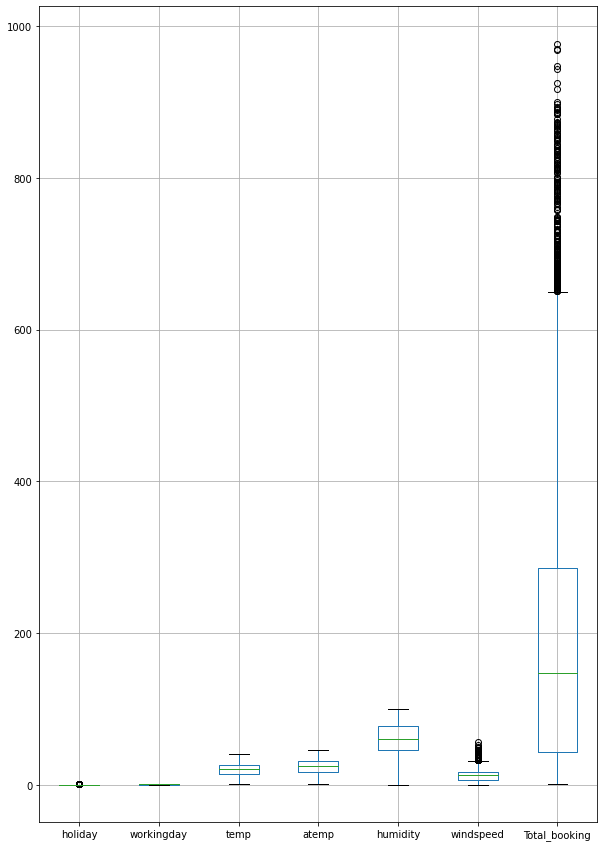

In [ ]:
df.boxplot(figsize=(10,15))

Removing Outliers

In [ ]:
q1 = df['windspeed'].quantile(.25)
q3 = df['windspeed'].quantile(.75)
IQR = q3-q1
df['windspeed'] = np.clip(df['windspeed'],q1-1.5*IQR, q3+1.5*IQR)
q1 = df['Total_booking'].quantile(.25)
q3 = df['Total_booking'].quantile(.75)
IQR = q3-q1
df['Total_booking'] = np.clip(df['Total_booking'],q1-1.5*IQR, q3+1.5*IQR)

Correlation Analysis

In [ ]:
df.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
holiday,1.000000,-0.249755,-0.000165,-0.005526,-0.004567,0.009161,-0.002029
workingday,-0.249755,1.000000,0.032189,0.026168,-0.009282,0.014731,0.003846
temp,-0.000165,0.032189,1.000000,0.984035,-0.066419,-0.024220,0.402210
atemp,-0.005526,0.026168,0.984035,1.000000,-0.044206,-0.065317,0.397661
humidity,-0.004567,-0.009282,-0.066419,-0.044206,1.000000,-0.320454,-0.313648
windspeed,0.009161,0.014731,-0.024220,-0.065317,-0.320454,1.000000,0.099736
Total_booking,-0.002029,0.003846,0.402210,0.397661,-0.313648,0.099736,1.000000


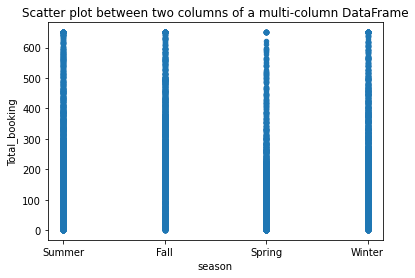

In [ ]:
df.plot.scatter(x='season', y='Total_booking', title= "Scatter plot between two columns of a multi-column DataFrame");

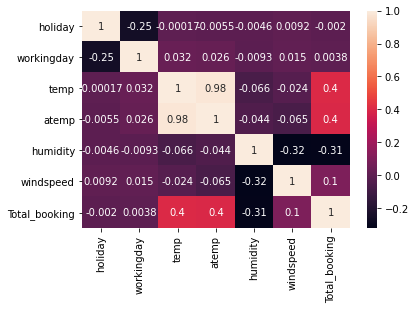

In [ ]:
sns.heatmap(df.corr(), annot=True)

Plotting Histogram to visualise categorical values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dc57f49b0>,
      dtype=object)

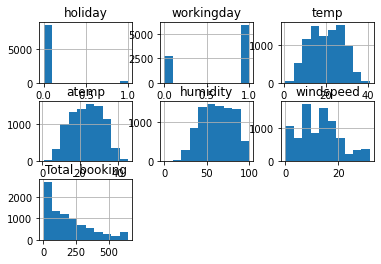

In [ ]:
df.hist()

Visualizing Total_booking Vs other features to generate insights

In [ ]:
df.groupby('season')['Total_booking'].count().sort_values(ascending=False)

season
Summer    2197
Fall      2189
Winter    2186
Spring    2136
Name: Total_booking, dtype: int64

In [ ]:
df.groupby('workingday')['Total_booking'].count().sort_values(ascending=False)

workingday
1    5924
0    2784
Name: Total_booking, dtype: int64

In [ ]:
df.groupby('month')['Total_booking'].count().sort_values(ascending=False)

month
11    740
4     736
6     734
7     733
12    733
8     731
5     727
9     725
2     723
3     720
10    713
1     693
Name: Total_booking, dtype: int64

In [ ]:
df.groupby('weather')['Total_booking'].count().sort_values(ascending=False)

weather
 Clear + Few clouds            5753
 Mist + Cloudy                 2276
 Light Snow, Light Rain         678
 Heavy Rain + Thunderstorm        1
Name: Total_booking, dtype: int64

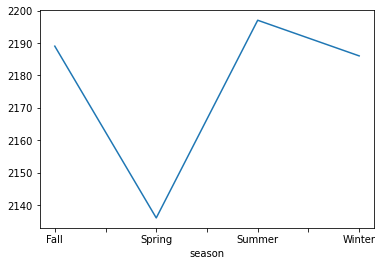

In [ ]:
df.groupby('season')['Total_booking'].count().plot()

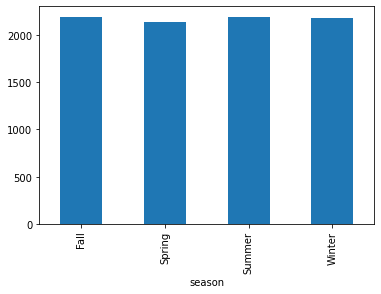

In [ ]:
df.groupby('season')['Total_booking'].count().plot.bar()

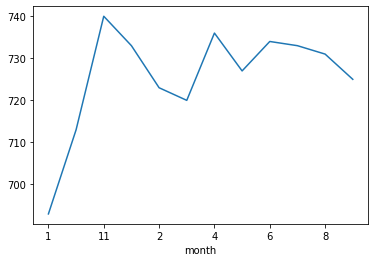

In [ ]:
df.groupby('month')['Total_booking'].count().plot()

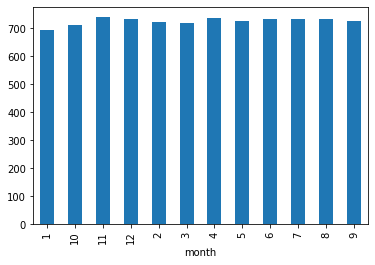

In [ ]:
df.groupby('month')['Total_booking'].count().plot.bar()

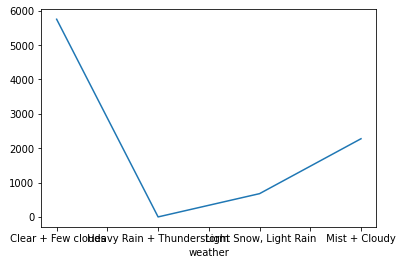

In [ ]:
df.groupby('weather')['Total_booking'].count().plot()

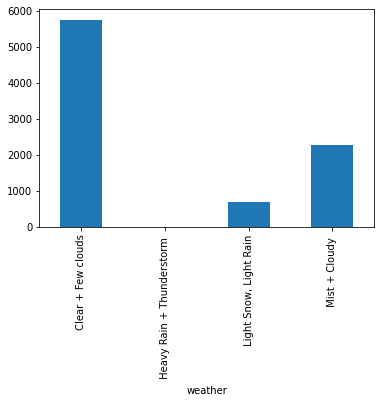

In [ ]:
df.groupby('weather')['Total_booking'].count().plot.bar()

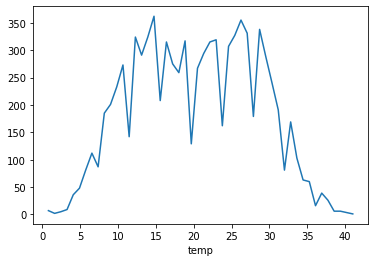

In [ ]:
df.groupby('temp')['Total_booking'].count().plot()

In [ ]:
df.groupby('hour')['Total_booking'].count().sort_values(ascending=False)

hour
10    384
9     381
13    377
23    373
15    371
16    371
12    370
19    368
18    366
17    365
6     365
11    362
22    361
21    361
2     360
5     360
7     359
20    358
3     353
14    353
1     353
0     350
8     346
4     341
Name: Total_booking, dtype: int64

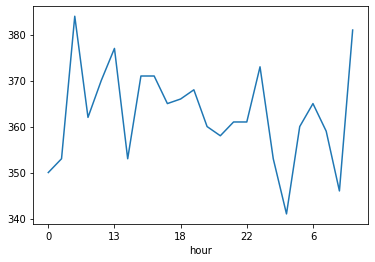

In [ ]:
df.groupby('hour')['Total_booking'].count().plot()

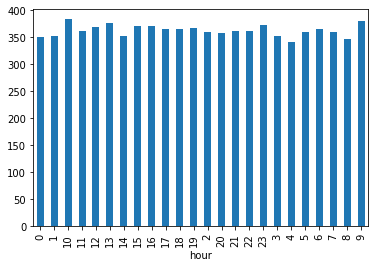

In [ ]:
df.groupby('hour')['Total_booking'].count().plot.bar()

Insights on features that pulled highest bookings

In [ ]:
print('Hour of Time with Highest Bookings:',df['hour'].value_counts().index[0])
print('Month with Highest Bookings:',df['month'].value_counts().index[0])
print('Season with Highest Bookings:',df['season'].value_counts().index[0])
print('Weather with Highest Bookings:',df['weather'].value_counts().index[0])

Hour of Time with Highest Bookings: 10
Month with Highest Bookings: 11
Season with Highest Bookings: Summer
Weather with Highest Bookings:  Clear + Few clouds


Feature Engineering

In [ ]:
df= df.drop(["date", "month", "hour"], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['season']=le.fit_transform(df['season'])
print(df.head())
print(df['season'].unique())

           datetime  season  holiday  ...  humidity windspeed  Total_booking
0    5/2/2012 19:00       2        0  ...        77   16.9979          504.0
1     9/5/2012 4:00       0        0  ...        79   19.0012            5.0
2    1/13/2011 9:00       1        0  ...        50   22.0028          139.0
3  11/18/2011 16:00       3        0  ...        29    8.9981          209.0
4   9/13/2011 13:00       0        0  ...        51   19.0012          184.0

[5 rows x 10 columns]
[2 0 1 3]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['weather']=le.fit_transform(df['weather'])
print(df.head())
print(df['weather'].unique())

           datetime  season  holiday  ...  humidity  windspeed  Total_booking
0    5/2/2012 19:00       2        0  ...        77    16.9979          504.0
1     9/5/2012 4:00       0        0  ...        79    19.0012            5.0
2    1/13/2011 9:00       1        0  ...        50    22.0028          139.0
3  11/18/2011 16:00       3        0  ...        29     8.9981          209.0
4   9/13/2011 13:00       0        0  ...        51    19.0012          184.0

[5 rows x 10 columns]
[0 2 3 1]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['datetime']=le.fit_transform(df['datetime'])
print(df.head())
print(df['datetime'].unique())

   datetime  season  holiday  ...  humidity  windspeed  Total_booking
0      5510       2        0  ...        77    16.9979          504.0
1      8549       0        0  ...        79    19.0012            5.0
2       153       1        0  ...        50    22.0028          139.0
3      1763       3        0  ...        29     8.9981          209.0
4      8134       0        0  ...        51    19.0012          184.0

[5 rows x 10 columns]
[5510 8549  153 ... 4443 2055   41]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_test['datetime']=le.fit_transform(X_test['datetime'])
print(X_test.head())
print(X_test['datetime'].unique())

   datetime  season  holiday  workingday  ...   temp   atemp  humidity  windspeed
0      1286  Summer        0           1  ...  21.32  25.000        48    35.0008
1      1633  Summer        0           0  ...  23.78  27.275        64     7.0015
2      1055  Spring        0           0  ...  11.48  12.120       100    27.9993
3       242  Winter        0           1  ...  25.42  28.790        83     0.0000
4      1561  Summer        0           0  ...  25.42  31.060        43    23.9994

[5 rows x 9 columns]
[1286 1633 1055 ... 1073 1300 1727]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_test['season']=le.fit_transform(X_test['season'])
print(X_test.head())
print(X_test['season'].unique())

   datetime  season  holiday  workingday  ...   temp   atemp  humidity  windspeed
0      1286       2        0           1  ...  21.32  25.000        48    35.0008
1      1633       2        0           0  ...  23.78  27.275        64     7.0015
2      1055       1        0           0  ...  11.48  12.120       100    27.9993
3       242       3        0           1  ...  25.42  28.790        83     0.0000
4      1561       2        0           0  ...  25.42  31.060        43    23.9994

[5 rows x 9 columns]
[2 1 3 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_test['weather']=le.fit_transform(X_test['weather'])
print(X_test.head())
print(X_test['weather'].unique())

   datetime  season  holiday  workingday  ...   temp   atemp  humidity  windspeed
0      1286       2        0           1  ...  21.32  25.000        48    35.0008
1      1633       2        0           0  ...  23.78  27.275        64     7.0015
2      1055       1        0           0  ...  11.48  12.120       100    27.9993
3       242       3        0           1  ...  25.42  28.790        83     0.0000
4      1561       2        0           0  ...  25.42  31.060        43    23.9994

[5 rows x 9 columns]
[0 1 2]


In [ ]:
X= df.drop(['Total_booking'], axis=1)
y=df['Total_booking']

Remove atemp feature as both temp and atemp are mutually correlated.

In [ ]:
X= X.drop(['atemp'], axis=1)
X_test= X_test.drop(['atemp'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_test = scaler.fit_transform(X_test)

In [ ]:
print(y)

0       504.0
1         5.0
2       139.0
3       209.0
4       184.0
        ...  
8703     13.0
8704     11.0
8705      1.0
8706     92.0
8707     31.0
Name: Total_booking, Length: 8708, dtype: float64


Task 2: Grid Search, Regression Analysis and Ensemble Modelling

 A class that will define all the regression models as methods

In [ ]:
class Models(object):
    
    global seed 
    seed = 34234
    
    # Initialization 
    def __init__(self, X, X_test, y, y_test):
        # changing input as dataframe to list
        self.X = [X.iloc[i].tolist() for i in range(len(X))]
        self.X_test = [X_test.iloc[i].tolist() for i in range(len(X_test))]
        self.y = y.tolist()
        self.y_test = y_test.tolist()
    
    
    @staticmethod
    def print_info(cross_val_scores, mse):
        print("Cross Validation Scores: ", cross_val_scores)
        print("Mean Squared Error: ", mse)
        
        
    # Linear Regression 
    def linear_regression(self, X, X_test,  y, y_test):
        reg = linear_model.LinearRegression()
        # X = np.array(X).reshape([-1, 1])
        reg.fit(self.X, self.y)
        y_pred_list = reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred_list)
        kfold = model_selection.KFold()
        cross_val_scores = cross_val_score(reg, self.X, self.y, cv=kfold)
        print("\nLinear Regression Model")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
        
    # Random Forest Regression model 
    def random_forest(self, X, X_test,  y, y_test):
        rfr = RandomForestRegressor()
        # X = np.array(X).reshape([-1, 1])
        rfr.fit(self.X, self.y)
        y_pred_list = rfr.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred_list)
        kfold = model_selection.KFold()
        cross_val_scores = cross_val_score(rfr, self.X, self.y, cv=kfold)
        print("\nRandom Forest Regressor")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
            
    # Lasso method 
    def lasso(self, X, X_test,  y, y_test):
        reg = linear_model.Lasso(alpha = 0.1)
        # X = np.array(X).reshape([-1, 1])
        reg.fit(self.X, self.y)
        y_pred_list = reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred_list)
        kfold = model_selection.KFold()
        cross_val_scores = cross_val_score(reg, self.X, self.y, cv=kfold)
        print("\nLasso Regression Model")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
    
    # Gradient Boosing Regressor
    def GBR(self, X, X_test,  y, y_test):
        gbr = GradientBoostingRegressor(n_estimators=180, learning_rate=0.1, max_depth=4, random_state=0, loss='ls')
        gbr.fit(self.X, self.y)
        kfold = model_selection.KFold()
        cross_val_scores = cross_val_score(gbr, self.X, self.y, cv=kfold)
        mse = mean_squared_error(self.y_test, gbr.predict(self.X_test))
        print('\nGradient Boosting Regressor')
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse

      # Decision Tree Regressor
    def DT(self, X, X_test,  y, y_test):
        dt = DecisionTreeRegressor()
        dt.fit(self.X, self.y)
        kfold = model_selection.KFold()
        cross_val_scores = cross_val_score(dt, self.X, self.y, cv=kfold)
        mse = mean_squared_error(self.y_test, dt.predict(self.X_test))
        print('\nDecision Tree Regressor')
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse    

We use GridSearchCV to find out the best set of parameters for GBR and use it for the regression model analysis and prediction

In [ ]:
parameters = {
    'n_estimators' : [170, 175, 180],
    'learning_rate' : [0.075, 0.08, 0.1],
    'max_depth' : [2, 3, 4]
}

gbr = GradientBoostingRegressor(n_estimators=250, learning_rate=0.1, max_depth=5, random_state=232, loss='ls')
gs_cv = GridSearchCV(gbr, parameters).fit(X, y)
gs_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 180}

In [ ]:
y=y.squeeze()
y_test=y_test.squeeze()

In [ ]:
from types import FunctionType

methods = [x for x, y in Models.__dict__.items() if type(y) == FunctionType]
methods.remove('__init__')
# Now calling the all regression methods
cross_scores_list, mse_list = [], []
for model in methods:
    reg = Models(X, X_test, y, y_test)
    cross_val_scores, mse = getattr(reg, model)(X, X_test, y, y_test)
    cross_scores_list.append(cross_val_scores)
    mse_list.append(mse)


Linear Regression Model
Cross Validation Scores:  [0.26556911 0.29343451 0.28791474 0.27440774 0.23992503]
Mean Squared Error:  23105.73803259426

Random Forest Regressor
Cross Validation Scores:  [0.4818136  0.48593595 0.4966472  0.51356792 0.45929312]
Mean Squared Error:  28020.29168080808

Lasso Regression Model
Cross Validation Scores:  [0.26588017 0.29330526 0.28790418 0.27439912 0.23975825]
Mean Squared Error:  23105.97643721085

Gradient Boosting Regressor
Cross Validation Scores:  [0.41593954 0.43505375 0.41435649 0.42252129 0.38281214]
Mean Squared Error:  25816.703323488626

Decision Tree Regressor
Cross Validation Scores:  [0.0681375  0.1451941  0.15161894 0.13139138 0.00703408]
Mean Squared Error:  49941.1027318641


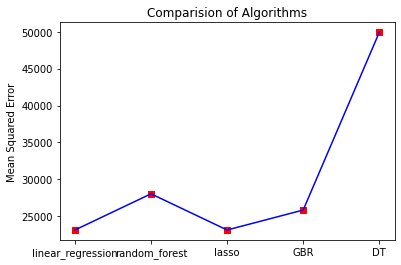

In [ ]:
# Plot Mean Squared Error

plt.plot(mse_list, c='b')
plt.title('Comparision of Algorithms')
plt.ylabel('Mean Squared Error')
x = np.array([0,1,2,3,4])
plt.scatter(x, mse_list, c='r', marker="s")
plt.xticks(x, methods)
plt.show()

Looking at the Graph,Linear Regression and Lasso models have higher scores.